# **Evaluación de la conectividad ecológica en el corregimiento de Santa Elena, Antioquia**

**Autor: Yina Sofía Racinez Jaramillo**

*yracinez@unal.edu.co*

*Universidad Nacional de Colombia*
*Facultad de Minas*
*Posgrado en Aprovechamiento de Recursos Hidráulicos*

*Código creado como ejercicio académico para el curso de Análisis Geoespacial*


## **Resumen**

## **Introducción**

## **Materiales y métodos**

### **Insumos**

1. **Coberturas de la tierra:** Corresponde con la clasificación realizada por Área Metropolitana del Valle de Aburrá -AMVA- escala 1:25.000
2. **Vías:** Obtenidas a partir de la cartografía base del Área Metropolitana del Valle de Aburrá, y complementadas a partir de imágenes satelitales (Google)
3. **Drenajes:** Obtenidas a partir de la cartografía del Plan de Ordenación y Manejo de la Cuenca Hidrográfica del río Aburrá-POMCA del Área Metropolitana del Valle de Aburrá


### **Configuración de ambiente de trabajo**

Se realizó la configuración del ambiente de trabajo para análisis geoespacial mediante la instalación del Paquete [Geospatial](https://geospatial.gishub.org/) de python, desarrollado por [Qiusheng Wu](https://scholar.google.com/citations?user=vmml4_0AAAAJ&hl=es&oi=ao), e instalado en WSL2 siguiendo los pasos dados por el autor en el siguiente video, [clic aquí](https://www.youtube.com/watch?v=N7qMP2Z8gks).

Posteriormente se importaron las librerías necesarias para el desarrollo del ejercicio académico

In [2]:
# importar las librerias para el desarrollo del estudio
import os # libreria para manejo de rutas de archivos
os.environ['USE_PYGEOS'] = '0' # para evitar advertencia pygeos deprecate y usar shapely por defecto
import geopandas as gpd # libreria para manejo de datos vectoriales
import matplotlib.pyplot as plt # libreria para graficas
import seaborn as sns # libreria para graficas
import rasterio # libreria para manejo de datos raster


### **Lectura de datos**

In [3]:
# nombre del geopackage con datos de entrada
nombre_gpkg_entrada = 'insumos_base.gpkg'

# ruta base para unir luego con gpkg, img y raster
ruta_base = os.getcwd()

# ruta a geopackage de datos de entrada
gpkg_entrada = os.path.join(ruta_base,nombre_gpkg_entrada)



In [4]:
ruta_base

'/mnt/e/analisis_geoespacial'

### **Área de estudio**

De acuerdo con la

### **Métodos**

1. Definición de los núcleos de conservación a conectar
2. Elaboración del mapa de fricción para el desplazamiento de las especies
3. Modelamiento de la red de conectividad ecológica


#### **Definición de núcleos de conservación a conectar**

#### **Elaboración del mapa de fricción para el desplazamiento de las especies**

Con el propósito de tener una superficie de fricción más acorde con la realidad del pasiaje ecológico, se realizó un  Proceso de Análisis Jerárquico (AHP-Analitycal hierarchy process) para la toma de decisiones, desarrollado por Thomas L. Saaty (1980).

En este proceso se consultó a  tres (3) profesionales: 1 biólogo flora, 1 ecólogo y 1 docente de ecología del paisaje.

La ponderación de las variables se realizó con base en el análisis multicriterio (variable), teniendo en cuenta una matriz de doble entrada. Los profesionales realizaron la calificación con base en el aporte de los criterios a la restricción o fricción del movimiento de las especies en el corregimiento de Santa Elena, Antioquia; entendiendo que:

*   Si la variable fila prima sobre la variable columna la calificación es un número entero (1, 3, 5, 7 o 9)
*   Si la variable columna prima sobre la variable fila, la califación es una fracción (1/1, 1/3, 1/5, 1/7 o 1/9)

A modo de ejemplo, se presenta la siguiente tabla:


Por otro lado, la escala numérica, su importancia y explicación se resenta a continuación:

#### **Modelamiento de la red de conectividad ecológica**

## **Resultados y discusión**

### **Clasificación supervisada de coberturas de la tierra**

### **Definición de núcleos de conservación a conectar**

### **Elaboración del mapa de fricción para el desplazamiento de las especies**

La matriz resultante y los valores de ponderación de cada una de las variables, se muestra a continuación

En este caso, se le otorgó mayor peso a las áreas núcleos (50%), seguido de las coberturas (27%), la distancia a la red hídrica (17%) y finalmente la distancia a las vías (5%)

Con base en lo anterior, se calcula entonces la nueva superficie de fricción como sigue:

### **Modelamiento de la red de conectividad ecológica**

## **Conclusiones**

## **Referencias**

* Wu, Q., (2020). geemap: A Python package for interactive mapping with Google Earth Engine. The Journal of Open Source Software, 5(51), 2305. https://doi.org/10.21105/joss.02305



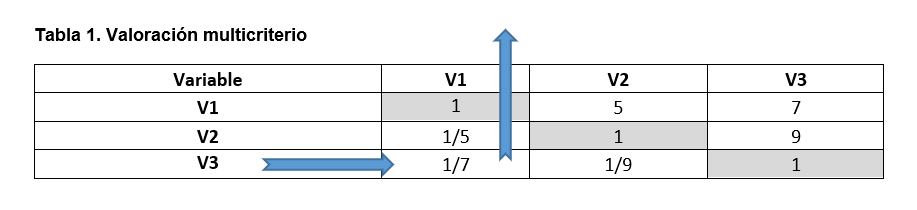


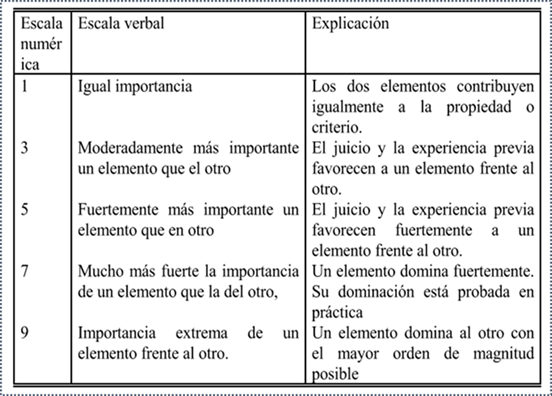


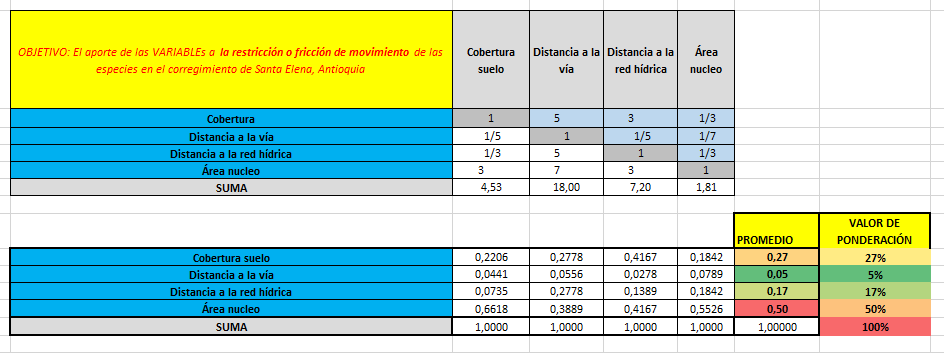

In [ ]:
# Se calcula la nueva superficie de fricción como:
sup_friccion_pond= an*0.5 + cob*0.27 + dd*0.17 + dv*0.05
plt.imshow(sup_friccion_pond)
plt.colorbar()



In [ ]:
# Para guardar el raster creado:
import rasterio
from rasterio.crs import CRS

# Arreglo numpy del raster
raster_data = sup_friccion_pond # El arreglo numpy del raster

# Dimensiones del arreglo
height, width = raster_data.shape

# Ruta de salida del archivo raster
output_file = 'sup_friccion_p.tif'

# Definir el código EPSG
epsg_code = 3116

# Crear el objeto CRS con el código EPSG
crs = CRS.from_epsg(epsg_code)

# Guardar el arreglo numpy como archivo raster con información espacial
with rasterio.open(output_file, 'w', driver='GTiff', height=height, width=width,
                   count=1, dtype=raster_data.dtype, crs=crs) as dst:
    dst.write(raster_data, 1)  # Escribir el arreglo numpy en la banda 1

print(f'Archivo raster guardado en: {output_file}')


